In [49]:
import pandas as pd
data_set = pd.read_csv('employee.csv', encoding='ISO-8859-1')
# travailler sur une copie pour faire des comparaisons
df = data_set.copy()


In [50]:
import numpy as np
# Calcule le nombre de valeurs manquantes selon chaque feature
# fonction old-school, existe certainement une fonction chez pandas...
def compute_missing_values(df):
    list_missing_val = {}
    col = df.columns
    for i, k in enumerate(col):
        list_missing_val[k] = df[k].isna().sum()
    return list_missing_val

In [51]:
df.shape
list = compute_missing_values(data_set)
print("missing values")
for i in list:
    print(f"{i}-->{list[i]:d}")

missing values
NAME-->6
DEPARTMENT_NAME-->6
TITLE-->6
REGULAR-->644
RETRO-->22150
OTHER-->8423
OVERTIME-->15706
INJURED-->21096
DETAIL-->20493
QUINN_EDUCATION_INCENTIVE-->21166
TOTAL_GROSS-->6
POSTAL-->6


In [52]:

# compte le nombre de tuples vides (toutes les features à nan)
# df[df.isna().all(axis=1)].shape[0]

# suppression des tuples vides (toutes les colonnes à NaN)
df = df.dropna(how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22546 entries, 0 to 22545
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   NAME                       22546 non-null  object
 1   DEPARTMENT_NAME            22546 non-null  object
 2   TITLE                      22546 non-null  object
 3   REGULAR                    21908 non-null  object
 4   RETRO                      402 non-null    object
 5   OTHER                      14129 non-null  object
 6   OVERTIME                   6846 non-null   object
 7   INJURED                    1456 non-null   object
 8   DETAIL                     2059 non-null   object
 9   QUINN_EDUCATION_INCENTIVE  1386 non-null   object
 10  TOTAL_GROSS                22546 non-null  object
 11  POSTAL                     22546 non-null  object
dtypes: object(12)
memory usage: 2.2+ MB


In [53]:
col = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 
       'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS', 'POSTAL']
# on remplace les , ' ou tout les trucs qui perturbent la convertion en float python.
df[col] = df[col].replace({',': '', "'": ''}, regex=True)

# on applique la converton en float
df[col] = df[col].apply(pd.to_numeric, errors='coerce')


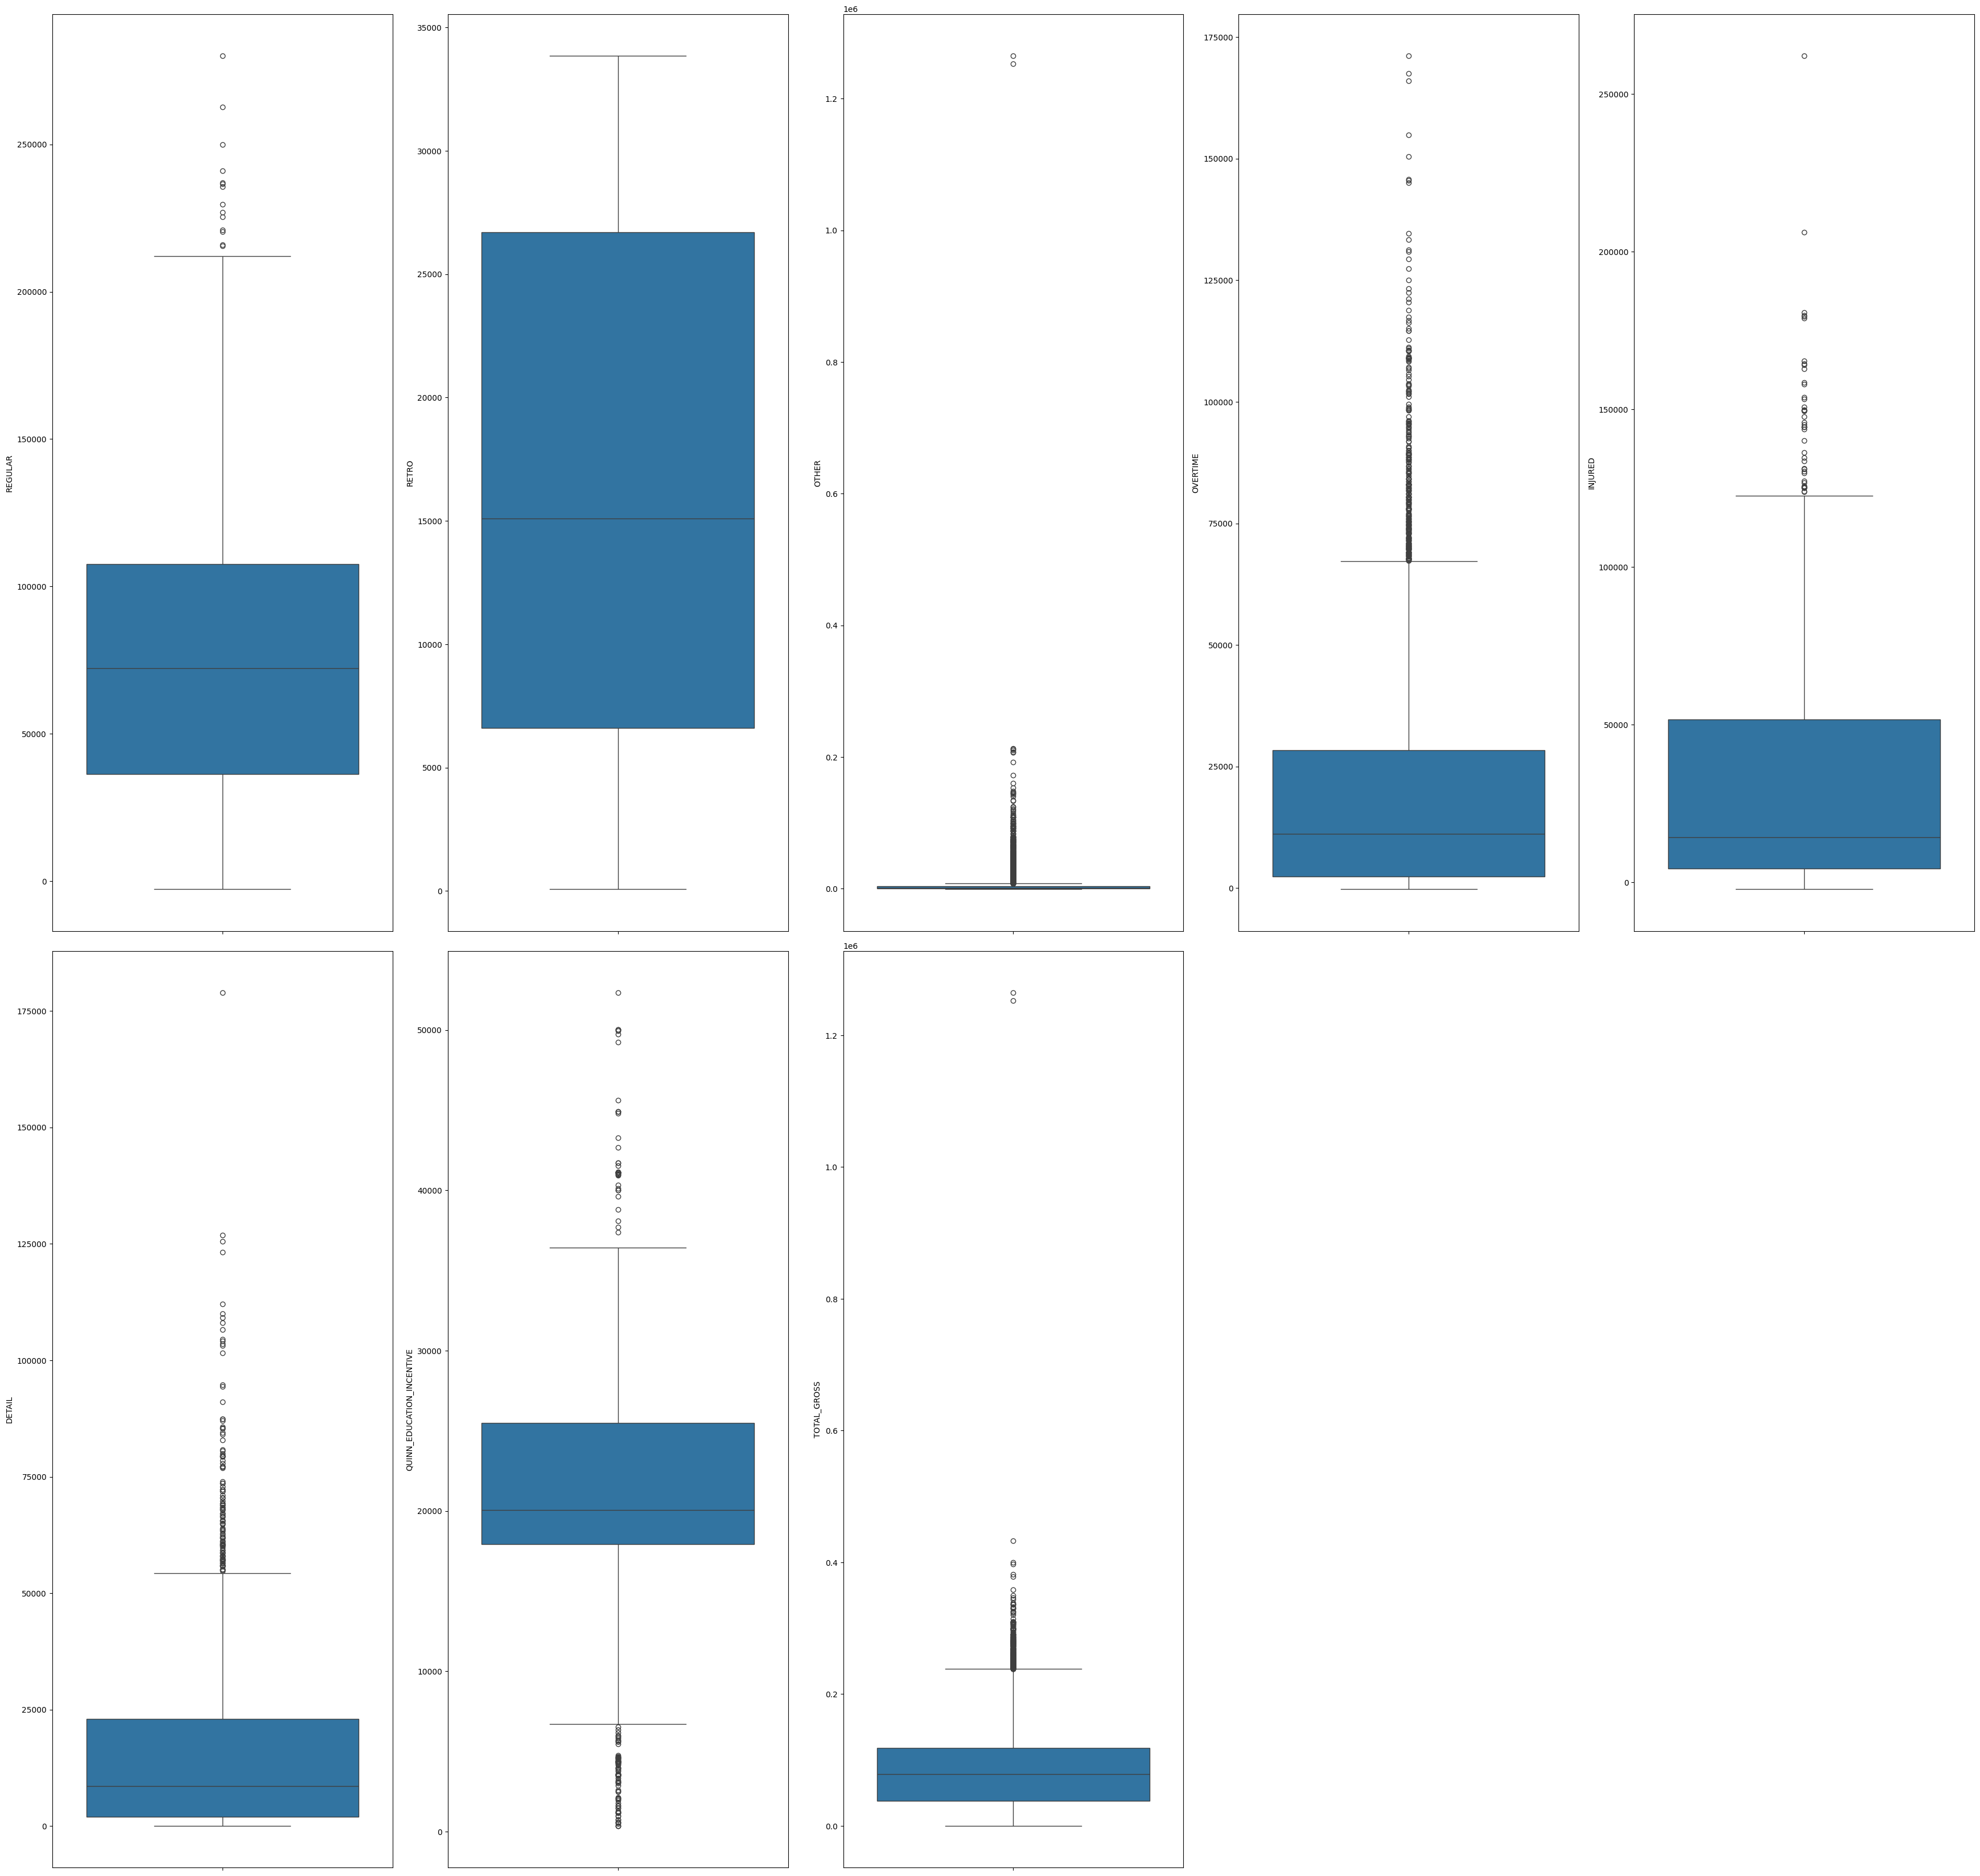

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
# on afficher les boxplots des features numériques pour observer à quoi cela ressemble
col = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS']

fig, axs = plt.subplots(2, 5, figsize=(35, 35))
axs = axs.flatten()
for i, col in enumerate(col):
    sns.boxplot(y=df[col], data=df, ax=axs[i])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
fig.delaxes(axs[-1])
fig.delaxes(axs[-2])
plt.show()

In [67]:
# Recherche d'outliers de manière univariée simple (boxplot vs IQR vs Z-score)
# préférable IQR ou boxplot -> utilisation de la médiane plus robuste pour des salaires
#
outliers_iqr = pd.DataFrame()
col = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS']

for feature in col:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers_iqr = pd.concat([outliers_iqr, feature_outliers])

outliers_iqr = outliers_iqr.drop_duplicates()

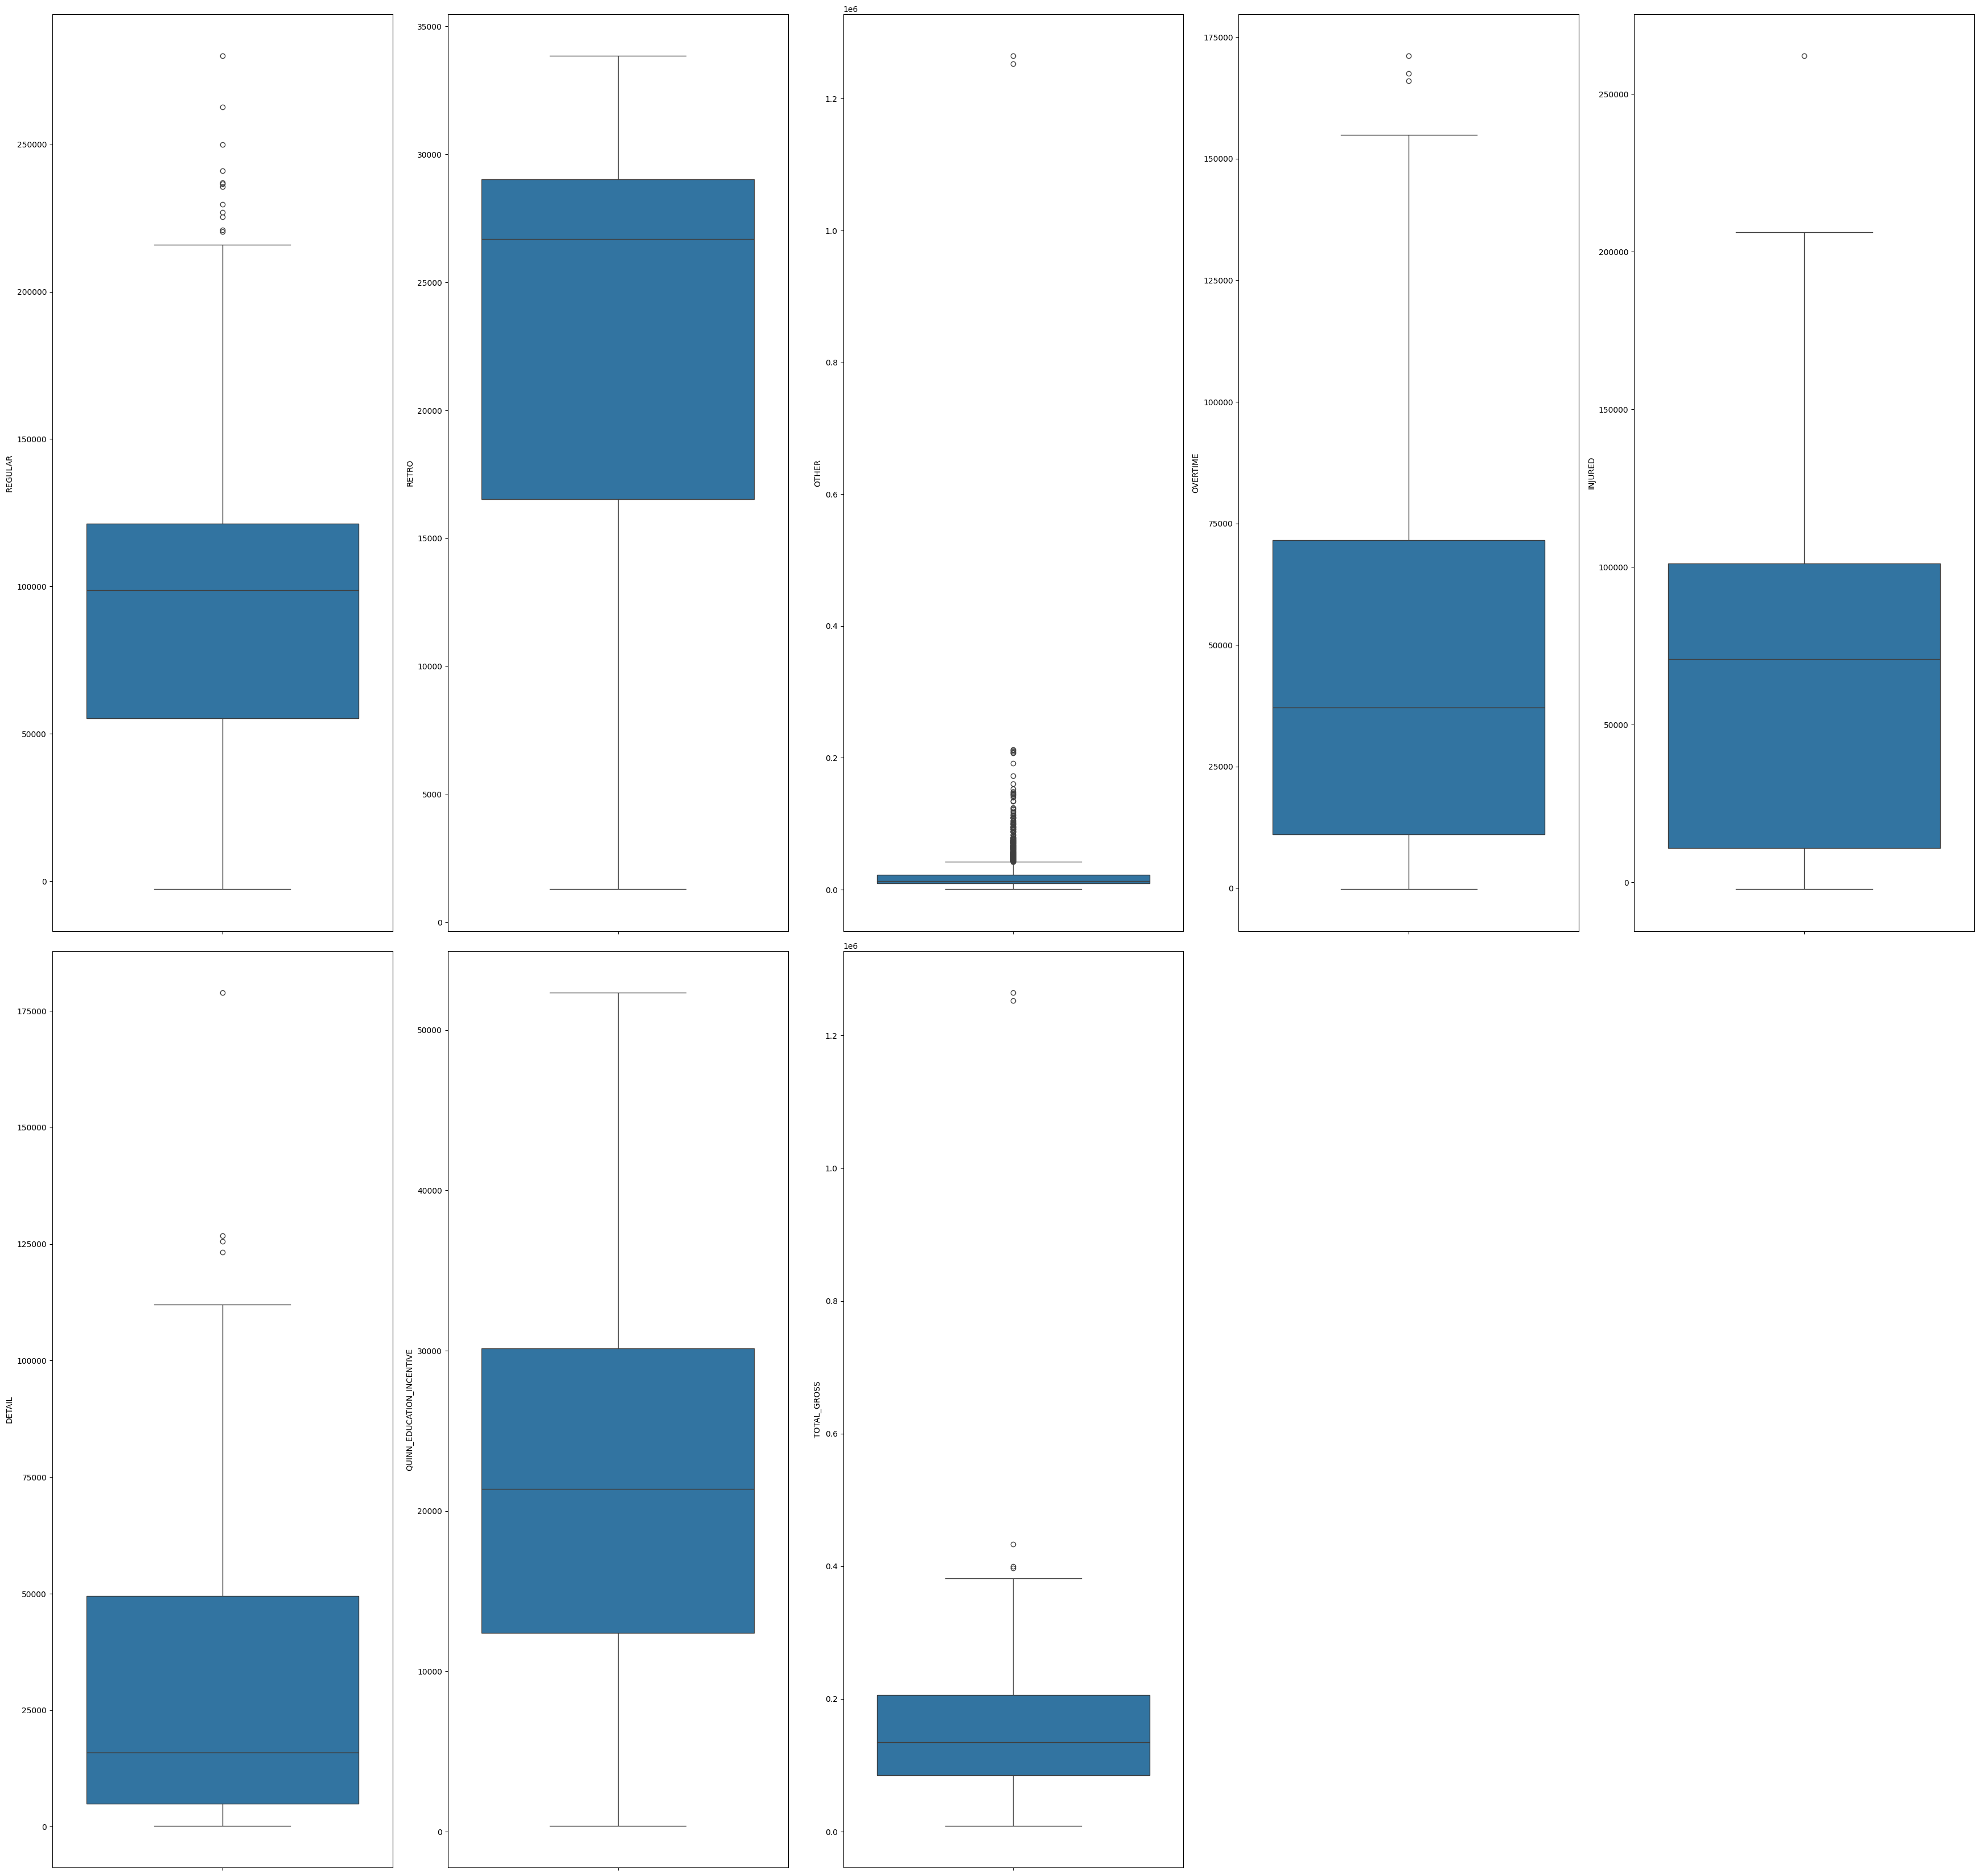

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
# on afficher les boxplots des features numériques pour observer à quoi cela ressemble
col = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS']

fig, axs = plt.subplots(2, 5, figsize=(35, 35))
axs = axs.flatten()
for i, col in enumerate(col):
    sns.boxplot(y=outliers_iqr[col], data=df, ax=axs[i])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
fig.delaxes(axs[-1])
fig.delaxes(axs[-2])
plt.show()

In [73]:
outliers_iqr.describe()

,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS,POSTAL
count,1686.000000,43.000000,1.972000e+03,915.000000,371.000000,529.000000,617.000000,1.973000e+03,1972.000000
mean,89160.125919,21834.270000,2.213183e+04,43867.068940,65250.122642,28197.073081,21572.260843,1.457067e+05,2731.526369
std,49119.901099,9291.267071,4.636782e+04,35426.949291,51297.004635,29065.180627,11249.048906,8.631369e+04,5096.852836
min,-2708.090000,1291.830000,5.500000e+02,-224.930000,-2163.680000,184.000000,356.630000,8.528500e+03,1027.000000
25%,55357.180000,16538.045000,9.188000e+03,11037.380000,10859.425000,4982.000000,12398.050000,8.503266e+04,2121.000000
50%,98641.745000,26699.430000,1.307954e+04,37117.450000,70870.340000,15952.000000,21368.180000,1.346750e+05,2131.000000
75%,121275.650000,29015.750000,2.242361e+04,71601.320000,101225.280000,49533.750000,30149.170000,2.061473e+05,2169.000000
max,279999.980000,33844.560000,1.264844e+06,171119.260000,262136.080000,178940.000000,52343.190000,1.264844e+06,97202.000000


In [ ]:
# nous supprimons les features non souhaitées pour faire la prédiction de TOTAL_GROSS






# Rapport

## Q2:
- La commande count() nous permet de connaître le nombre de tuple pour chaque feature. Nous avons 22546 enregistrements et 12
  colonnes (features).
- La fonction codée plus haut nous permet de connaître le nombre de valeurs manquantes. En voici la sortie:
  missing values
NAME-->6
DEPARTMENT_NAME-->6
TITLE-->6
REGULAR-->644
RETRO-->22150
OTHER-->8423
OVERTIME-->15706
INJURED-->21096
DETAIL-->20493
QUINN_EDUCATION_INCENTIVE-->21166
TOTA
POSTAL-->6
L_GROSS-->6
- Oui il y 6 tuples dont toutes les colonness
POSTAL-->6





